# 3. `Discharge` object
The `discharge` object is one of the core objects in pySIMDEUM. By default, a `discharge` profile is not simulated when generating a `House`. The `simulate_discharge=True` argument needs to be toggled on to simulate discharge profiles. Effectively, it is a representation of the wastewater discharge for a household. The key point is that it is directly linked to the consumption simulation. Consumption events of an enduse directly trigger a matching discharge event.

## `Discharge` data structure

The discharge object is a `xarray.Dataset` containing:

* a `xarray.DataArray` (similar format to the `consumption` object) with discharge flows
* a list of dictionaries containing `discharge_events` metadata

The `xarray.DataArray` structure of `discharge` is a multidimensional array to handle the labelled flow data. The core of the DataArray is the numerical data of discharge flow rates in litres per second.

Dimensions define the axes of the data, and are:

* `time`:  temporal resolution of the data
* `enduse`: appliances that are sampled to populated this household
* `user`: individual household members
* `patterns`: represents different consumption patterns / scenarios

The coordinates are effectively the axes labels. For example, `time` will be populated with timestamps. `enduse` will be specific appliances such as `shower`, `wc` etc.

In [1]:
import pysimdeum
import matplotlib.pyplot as plt

Initialise a two-person household

In [2]:
# Build a house (one-person household)
house = pysimdeum.built_house(house_type='two_person', simulate_discharge=True)

/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:287: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  s.iloc[start:end] = intensity
/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:343: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6723566666666668' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  discharge_pattern.loc[discharge_start:discharge_end - pd.Timedelta(seconds=1)] = discharge_rate # restrict range to not be inclusive of final timstamp as this would result in extra discharge
/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:343: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '

The `discharge` profile is simulated when generating a `House` and can be accessed directly from the `House` instance.

In [3]:
house.discharge

<xarray.Dataset> Size: 34MB
Dimensions:           (time: 86401, user: 3, enduse: 8, patterns: 1,
                       dischargetypes: 2, dim_0: 272)
Coordinates:
  * time              (time) datetime64[ns] 691kB 2025-04-04 ... 2025-04-05
  * user              (user) <U9 108B 'user_1' 'user_2' 'household'
  * enduse            (enduse) <U14 448B 'Wc' 'Bathtub' ... 'WashingMachine'
  * patterns          (patterns) int64 8B 0
  * dischargetypes    (dischargetypes) <U10 80B 'greywater' 'blackwater'
Dimensions without coordinates: dim_0
Data variables:
    discharge         (time, user, enduse, patterns, dischargetypes) float64 33MB ...
    discharge_events  (dim_0) object 2kB {'enduse': 'Wc', 'usage': 'urine', '...

You can access the discharge dataarray of the `discharge` Dataset. It is structued in a similar way to the `consumption` object.

In [4]:
house.discharge.discharge

<xarray.DataArray 'discharge' (time: 86401, user: 3, enduse: 8, patterns: 1,
                               dischargetypes: 2)> Size: 33MB
array([[[[[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],

         ...,

         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]]],


        [[[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],
...
         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]]],


        [[[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],

         ...,

         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]]]]])
Coordinates:
  * time            (time) datetime64[ns] 691kB 2025-04-04 ... 2025-04-05
  * user            (user) <U9 108B 'user_1' 'user_2' 'household'
  * enduse          (enduse) <U14 448B 'Wc' 'Bathtub' ... 'WashingMachine'
  * patterns        (patterns) int64 8B 0
  * dischargetypes  (dischargetypes) <U10 80B 'greywater' 'blackwater'

And the corresponding metadata within `discharge_events`. It is formed of a list of dictionaries, with each dictionary tracking a discharge event of an enduse. The main use case for this is to keep track of usage types of enduses that are not relevant during simulation stage such as whether the usage of a `Wc` is sampled as `urine` or `faeces` as this will affect nutrient concentration sampling process, but at simulation stage it is only relevant whether a half or full flush is used (and this is somewhat indepdent of urine or faeces use). Discharge temperature is also stored for use in post-processing analysis of wastewater profiles.

In [5]:
house.discharge.discharge_events

<xarray.DataArray 'discharge_events' (dim_0: 272)> Size: 2kB
array([{'enduse': 'Wc', 'usage': 'urine', 'start': 71124, 'end': 71132, 'discharge_temperature': 20},
       {'enduse': 'Wc', 'usage': 'urine', 'start': 61726, 'end': 61734, 'discharge_temperature': 20},
       {'enduse': 'Wc', 'usage': 'faeces', 'start': 21426, 'end': 21434, 'discharge_temperature': 20},
       {'enduse': 'Wc', 'usage': 'urine', 'start': 27632, 'end': 27640, 'discharge_temperature': 20},
       {'enduse': 'Wc', 'usage': 'urine', 'start': 81894, 'end': 81902, 'discharge_temperature': 20},
       {'enduse': 'Wc', 'usage': 'urine', 'start': 68585, 'end': 68593, 'discharge_temperature': 20},
       {'enduse': 'Wc', 'usage': 'urine', 'start': 72102, 'end': 72110, 'discharge_temperature': 20},
       {'enduse': 'Wc', 'usage': 'urine', 'start': 727, 'end': 735, 'discharge_temperature': 20},
       {'enduse': 'Wc', 'usage': 'urine', 'start': 30636, 'end': 30644, 'discharge_temperature': 20},
       {'enduse': 'Wc', 'usage': 'urine', 'start': 52912, 'end': 52920, 'discharge_temperature': 20},
       {'enduse': 'Wc', 'usage': 'urine', 'start': 28988, 'end': 28996, 'discharge_temperature': 20},
       {'enduse': 'Wc', 'usage': 'urine', 'start': 51370, 'end': 51378, 'discharge_temperature': 20},
       {'enduse': 'Wc', 'usage': 'urine', 'start': 324, 'end': 332, 'discharge_temperature': 20},
       {'enduse': 'Wc', 'usage': 'urine', 'start': 66233, 'end': 66241, 'discharge_temperature': 20},
       {'enduse': 'Wc', 'usage': 'urine', 'start': 28590, 'end': 28598, 'discharge_temperature': 20},
       {'enduse': 'Wc', 'usage': 'urine', 'start': 30024, 'end': 30032, 'discharge_temperature': 20},
       {'enduse': 'BathroomTap', 'usage': 'washing_shaving', 'start': 21444, 'end': 21531, 'discharge_temperature': 40},
       {'enduse': 'BathroomTap', 'usage': 'brushing_teeth', 'start': 26628, 'end': 26679, 'discharge_temperature': 10},
       {'enduse': 'BathroomTap', 'usage': 'brushing_teeth', 'start': 60486, 'end': 60572, 'discharge_temperature': 10},
       {'enduse': 'BathroomTap', 'usage': 'brushing_teeth', 'start': 28866, 'end': 28915, 'discharge_temperature': 10},
...
       {'enduse': 'Wc', 'usage': 'urine', 'start': 30024, 'end': 30032, 'discharge_temperature': 20},
       {'enduse': 'BathroomTap', 'usage': 'washing_shaving', 'start': 21444, 'end': 21531, 'discharge_temperature': 40},
       {'enduse': 'BathroomTap', 'usage': 'brushing_teeth', 'start': 26628, 'end': 26679, 'discharge_temperature': 10},
       {'enduse': 'BathroomTap', 'usage': 'brushing_teeth', 'start': 60486, 'end': 60572, 'discharge_temperature': 10},
       {'enduse': 'BathroomTap', 'usage': 'brushing_teeth', 'start': 28866, 'end': 28915, 'discharge_temperature': 10},
       {'enduse': 'BathroomTap', 'usage': 'brushing_teeth', 'start': 84397, 'end': 84417, 'discharge_temperature': 10},
       {'enduse': 'KitchenTap', 'usage': 'dishes', 'start': 31130, 'end': 31158, 'discharge_temperature': 40},
       {'enduse': 'KitchenTap', 'usage': 'washing_hands', 'start': 61921, 'end': 61925, 'discharge_temperature': 10},
       {'enduse': 'KitchenTap', 'usage': 'dishes', 'start': 69399, 'end': 69434, 'discharge_temperature': 40},
       {'enduse': 'KitchenTap', 'usage': 'other', 'start': 30828, 'end': 31455, 'discharge_temperature': 10},
       {'enduse': 'KitchenTap', 'usage': 'other', 'start': 82466, 'end': 82600, 'discharge_temperature': 10},
       {'enduse': 'KitchenTap', 'usage': 'dishes', 'start': 68007, 'end': 68616, 'discharge_temperature': 40},
       {'enduse': 'KitchenTap', 'usage': 'washing_hands', 'start': 64163, 'end': 64224, 'discharge_temperature': 10},
       {'enduse': 'KitchenTap', 'usage': 'consumption', 'start': 21396, 'end': 21483, 'discharge_temperature': 0},
       {'enduse': 'KitchenTap', 'usage': 'other', 'start': 31100, 'end': 31641, 'discharge_temperature': 10},
       {'enduse': 'KitchenTap', 'usage': 'dishes', 'start': 28027, 'end': 28091, 'discharge_temperature': 40},
 

The `discharge` dataarray can be used to produce plots of wastewater discharge summed across enduses and users as below.

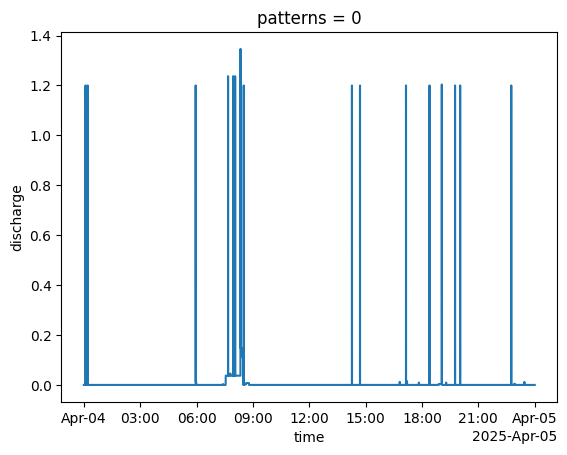

In [6]:
house.discharge.discharge.sum(["enduse","user","dischargetypes"]).plot()

Or if you are specifically interested in the discharge of a certain enduse such as the `Wc`

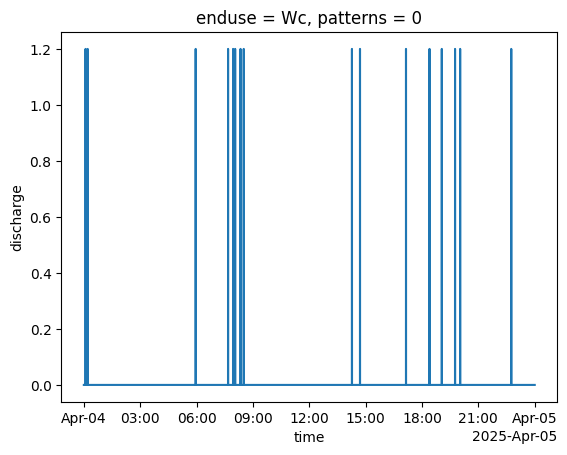

In [7]:
house.discharge.discharge.sum(["user","dischargetypes"]).sel(enduse="Wc").plot()